# import and load data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import plottingTools as pt
from plottingTools import sample_to_8wells, sample_to_7wells, blank_wells

from matplotlib import cm, gridspec

avb_cols = {'pur':'#5B49B6', 
            'blu':'#52A4D9', 
            'tur':'#59C09D',
            'tea':'#B3EBAD',
            'yel': '#C3D64C',
            'gra':'#9B9B9D'}

/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
dout = '/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/pairedEnd/ex58/fig5/'


In [3]:
din = '/Users/davidding/Dropbox (HMS)/parESingleLibrary/ex58_evovlability_suprpessors/platereader/'

# plot them all

In [4]:

# get data
sample_to_n1 = {1: 'wt_t_at_411',
                2: 'mcs_at_dds441',
                3: 'V5L',
                4: 'A66F',
                5: 'D55E',
                6: 'V75C',
                7: 'N99V',
                #8: 'V5L/A66F', use the one from the first day
              }
    
df_data1 = pd.read_csv(din + '210311_p1_6e5_first_half.csv')

#6e5 last set
sample_to_n2 = {1: 'wt_t_at_411',
                2: 'mcs_at_dds441',
                3: 'N99V',
                4: 'R100W',
                5: 'E87M',
                6: 'A66I',
                7: 'V5L/A66F',
                8: 'V5L/D55E',
              }

df_data2 = pd.read_csv(din + '210310_p1_6e5_data.csv')

#1.2e-4 second set
sample_to_n3 = {1: 'wt_t_at_411',
                2: 'mcs_at_dds441',
                3: 'V5L',
                4: 'A66F',
                5: 'D55E',
                6: 'V75C',
                7: 'N99V',
                #8: 'V5L/A66F', use the one from sample_to_n4
              }
    
df_data3 = pd.read_csv(din + '210311_p2_12e4_first_half.csv')

#1.2e-4
sample_to_n4 = {1: 'wt_t_at_411',
                2: 'mcs_at_dds441',
                3: 'N99V',
                4: 'R100W',
                5: 'E87M',
                6: 'A66I',
                7: 'V5L/A66F',
                8: 'V5L/D55E',
              }
    
df_data4 = pd.read_csv(din + '210310_p2_12e4_data.csv')

n_df_tups_low = [(sample_to_n1, df_data1),
             (sample_to_n2, df_data2)]
n_df_tups_high=[(sample_to_n3, df_data3),
            (sample_to_n4, df_data4)]

In [5]:
# adds a continuous number of hours
def date_str_to_hours(date_str):
    # expects '0:14:10'
    hh, mm, ss = date_str.split(':')
    return float(hh) + (float(mm)+1)/60
n_df_hrs_tups_low =[]
for n,df in n_df_tups_low:
    df_new = df
    df_new['Time'] = df_new.Time.apply(lambda x: date_str_to_hours(x))
    n_df_hrs_tups_low.append((n,df_new))
n_df_hrs_tups_high =[]
for n,df in n_df_tups_high:
    df_new = df
    df_new['Time'] = df_new.Time.apply(lambda x: date_str_to_hours(x))
    n_df_hrs_tups_high.append((n,df_new))

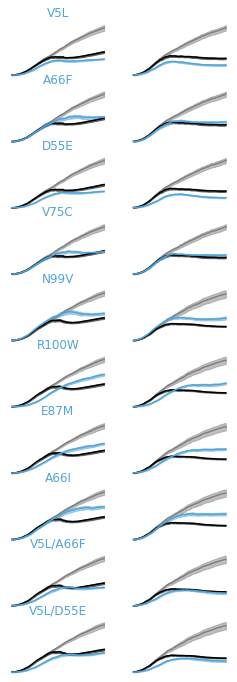

In [6]:
# plotting all in different quadrants

#10x2 grid, each mutant in a different quadrant with a different 



def plot_mut(t_mut, n_df_tups, ax, mut_col='blue', show_title=True, first_n_show=50, show_ax=False):
    # fetch the right dictionary of the data
    sample_to_n_curr = None
    df_data_curr = None
    for sample_to_n, df_data in n_df_tups:
        for n_iter, t_mut_iter in sample_to_n.items():
            if t_mut == t_mut_iter:
                sample_to_n_curr = sample_to_n
                df_data_curr = df_data
                n= n_iter
    #construct dictionary to iterate over and plot
    sample_to_n_curr = {1: 'wt_t_at_411',
                        2: 'mcs_at_dds441',
                        n: t_mut
                       }
    #plot them
    for n, sample_n in sample_to_n_curr.items():
        
        blank = np.mean(df_data[blank_wells], axis=1)

        wells = sample_to_wells[n]
        wells_keep = [well for well in wells if well not in wells_exclude]
        ind_traces = df_data_curr[wells_keep]
        mean_traces = np.mean(ind_traces, axis=1)
        from_blank = mean_traces - blank
        #if plot_log:
        #    from_blank_plot = np.log(from_blank)
        #else:
        from_blank_plot = from_blank
        
        # set colors
        if sample_n == 'wt_t_at_411':
            c='grey'
        elif sample_n == 'mcs_at_dds441':
            c='black'
        else:
            c = mut_col
        ax.plot(df_data_curr['Time'][:first_n_show], 
                from_blank_plot[:first_n_show], 
                label=sample_n, 
                color=c)
        std_traces = np.std(ind_traces, axis=1)
        #if plot_log:
        #    lower= np.log(from_blank - std_traces)
        #    upper = np.log(from_blank + std_traces)
        #else:
        lower =from_blank - std_traces
        upper = from_blank + std_traces

        ax.fill_between(df_data_curr['Time'][:first_n_show], 
                        upper[:first_n_show], 
                        lower[:first_n_show], alpha=0.5, color=c)

    if show_title:
        ax.set_title(t_mut, color=mut_col, loc='center')


    if not show_ax:

        ax.set_xticks([])
        ax.set_xticklabels([])

        ax.set_yticks([])
        ax.axis('off')
    

sample_to_wells = sample_to_8wells
wells_exclude=[]


fig = plt.figure(figsize=(4,12))
gs = gridspec.GridSpec(10, 2)

t_mut_to_pos = {
    'V5L':1,
    'A66F':2,
    'D55E':3,
    'V75C':4,
    'N99V':5,
    'R100W':6,
    'E87M':7,
    'A66I':8,
    'V5L/A66F':9,
    'V5L/D55E':10
}

for t_mut, plot_pos in t_mut_to_pos.items():
    show_ax = False    
    ax_low = plt.subplot(gs[plot_pos-1, 0])
    ax_high = plt.subplot(gs[plot_pos-1, 1])

    plot_mut(t_mut, n_df_hrs_tups_low, ax=ax_low, mut_col=avb_cols['blu'], 
             show_title=True, 
            show_ax=show_ax)

    # plot the high one
    plot_mut(t_mut, n_df_hrs_tups_high, ax=ax_high, mut_col=avb_cols['blu'], 
             show_title=False,
            show_ax=show_ax)    
plt.savefig(dout+'final_toxicity_2_conc.pdf', format='pdf')
plt.savefig(dout+'final_toxicity_2_conc.svg', format='svg')
plt.show()